In [1]:
from audio import *
from OFDM import *
%matplotlib inline

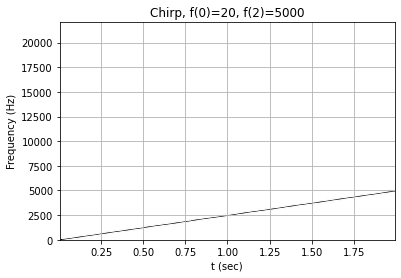

In [2]:
fs = 44100
T = 2
f0 = 20
f1 = 5000

t = np.linspace(0, T, T*fs)
fsweep = chirp(t, f0=f0, f1=f1, t1=T, method='linear')
fsweep_reverse = fsweep[::-1]

ff, tt, Sxx = spectrogram(fsweep, fs=fs, noverlap=256, nperseg=512,nfft=2048)
plt.pcolormesh(tt, ff, Sxx, cmap='gray_r')
plt.title('Chirp, f(0)={}, f({})={}'.format(f0,T,f1))
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.show()

1
[-0.70710678-0.70710678j -0.70710678-0.70710678j -0.70710678-0.70710678j
 -0.70710678-0.70710678j -0.70710678+0.70710678j -0.70710678+0.70710678j
 -0.70710678-0.70710678j  0.70710678-0.70710678j -0.70710678+0.70710678j
 -0.70710678+0.70710678j -0.70710678+0.70710678j -0.70710678-0.70710678j
 -0.70710678-0.70710678j  0.70710678+0.70710678j -0.70710678+0.70710678j
 -0.70710678+0.70710678j -0.70710678+0.70710678j  0.70710678-0.70710678j
 -0.70710678+0.70710678j -0.70710678+0.70710678j  0.70710678-0.70710678j
 -0.70710678+0.70710678j -0.70710678-0.70710678j -0.70710678-0.70710678j
  0.70710678-0.70710678j  0.70710678+0.70710678j  0.70710678-0.70710678j
 -0.70710678+0.70710678j -0.70710678+0.70710678j  0.70710678+0.70710678j
 -0.70710678+0.70710678j  0.70710678-0.70710678j -0.70710678+0.70710678j
  0.70710678-0.70710678j  0.70710678-0.70710678j  0.70710678-0.70710678j
 -0.70710678-0.70710678j -0.70710678+0.70710678j -0.70710678+0.70710678j
  0.70710678+0.70710678j  0.70710678-0.70710678j 

/Users/Adam/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


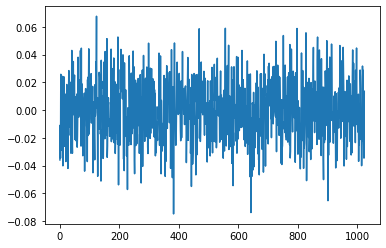

In [12]:
bits = np.random.binomial(n=1, p=0.5, size=(1024, ))
ofdm = CamG(512,1024,"QPSK")
bits = ofdm.SP(bits)
print(bits.shape[0])
known_signal = ofdm.map(bits)
print(known_signal)
known_signal = np.concatenate((known_signal, np.conj(known_signal)))
known_signal[0] = 0
known_signal[511] = 0
sp = np.fft.ifft(known_signal)

plt.plot(np.arange(1024),sp)

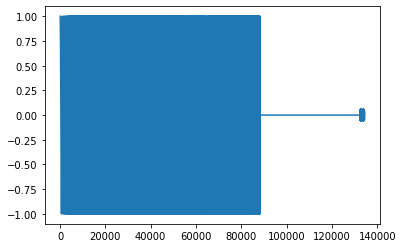

In [4]:
cp = sp[-1024:]
sp_wcp = np.hstack([cp,sp])

#tx = np.hstack([sp_wcp,sp_wcp])
tx = sp_wcp
len(tx)

tx = np.pad(tx, (fs,0), mode='constant', constant_values=0)

tx = np.hstack([fsweep,tx])

plt.plot(np.arange(len(tx)),tx)

In [5]:
#scipy.io.wavfile.write(r"sound_files/chirp.wav", fs, fsweep)

signal = play_record(fsweep, fs=fs, padding_before = 1,padding_after=1)

Recording...
Finished recording


In [20]:
#signal = tx
sync_signal = np.convolve(signal ,fsweep_reverse,mode='full')

159101


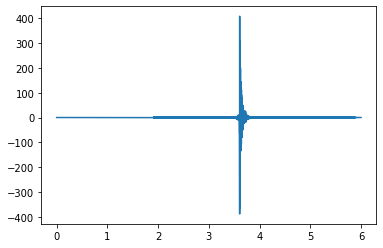

In [21]:
time = np.linspace(0, len(sync_signal) /fs, len(sync_signal))
plt.plot(time,sync_signal)

index_max = np.where(sync_signal == np.amax(sync_signal))[0][0]
print(index_max)

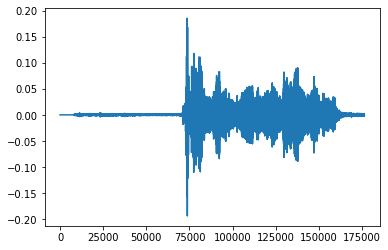

In [22]:
zero_index = index_max + 1025
rx = signal
#rx_wo_cp = rx[:-1024]
#rx_symbols = np.fft.fft(rx_wo_cp)
plt.plot(np.arange(len(rx)),rx)